<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/BT3_GRAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.1 MB/s eta 0:00:00


Discount Percentage: 15.000000000000005%


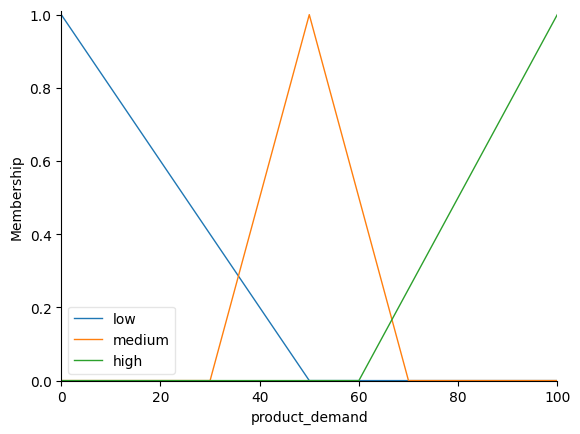

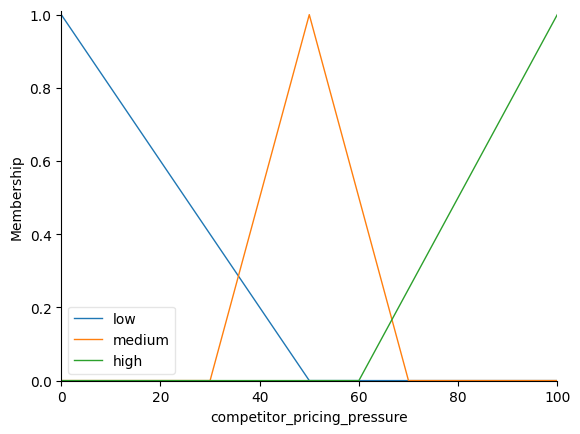

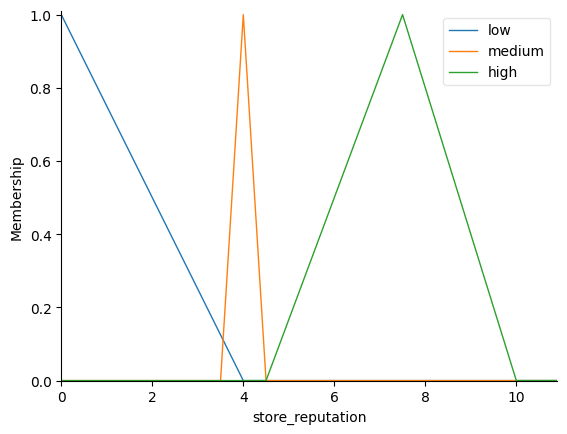

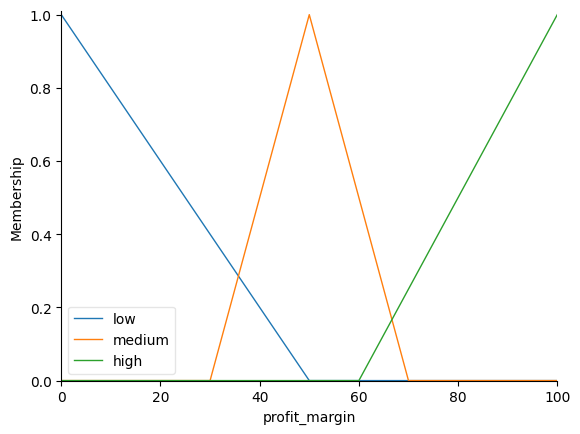

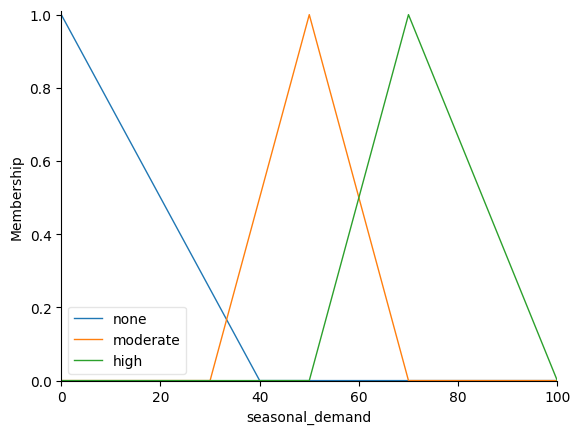

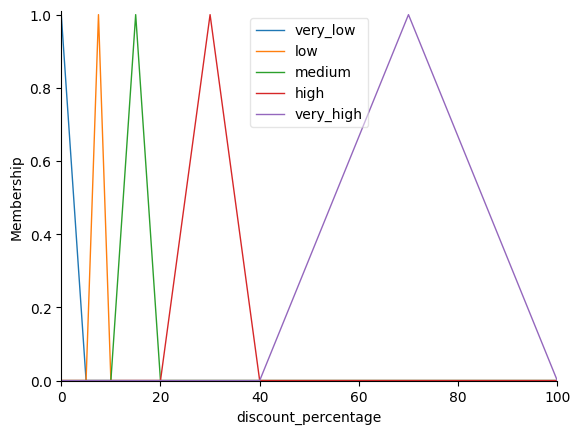

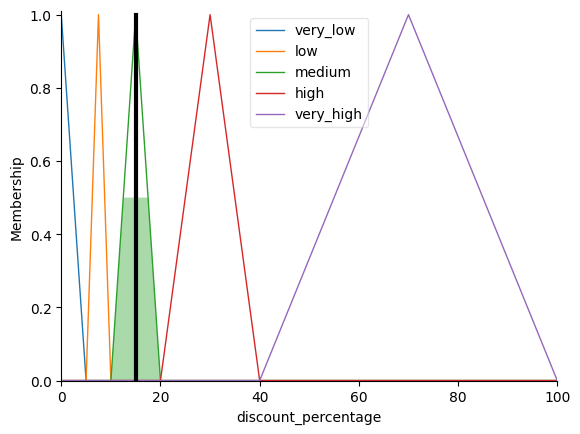

In [30]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


product_demand = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'product_demand')
competitor_pricing_pressure = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'competitor_pricing_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 11, 0.1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'seasonal_demand')

discount_percentage = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'discount_percentage')

product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 50])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [30, 50, 70])
product_demand['high'] = fuzz.trimf(product_demand.universe, [60, 100, 100])

competitor_pricing_pressure['low'] = fuzz.trimf(competitor_pricing_pressure.universe, [0, 0, 50])
competitor_pricing_pressure['medium'] = fuzz.trimf(competitor_pricing_pressure.universe, [30, 50, 70])
competitor_pricing_pressure['high'] = fuzz.trimf(competitor_pricing_pressure.universe, [60, 100, 100])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [0, 0, 4])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [3.5, 4, 4.5])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [4.5, 7.5, 10])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 50])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [30, 50, 70])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [60, 100, 100])

seasonal_demand['none'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 40])
seasonal_demand['moderate'] = fuzz.trimf(seasonal_demand.universe, [30, 50, 70])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [50,70,100])

discount_percentage['very_low'] = fuzz.trimf(discount_percentage.universe, [0, 0, 5])
discount_percentage['low'] = fuzz.trimf(discount_percentage.universe, [5,7.5,10])
discount_percentage['medium'] = fuzz.trimf(discount_percentage.universe, [10, 15, 20])
discount_percentage['high'] = fuzz.trimf(discount_percentage.universe, [20,30, 40])
discount_percentage['very_high'] = fuzz.trimf(discount_percentage.universe, [40, 70, 100])

rules = [
    ctrl.Rule(product_demand['high'] & competitor_pricing_pressure['low'] & profit_margin['low'], discount_percentage['very_low']),
    ctrl.Rule(product_demand['low'] & competitor_pricing_pressure['high'] & profit_margin['high'], discount_percentage['high']),
    ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium']),
    ctrl.Rule(competitor_pricing_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high']),
    ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium']),
    ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pricing_pressure['low'], discount_percentage['very_low']),
    ctrl.Rule(profit_margin['high'] & competitor_pricing_pressure['medium'] & seasonal_demand['moderate'], discount_percentage['medium'])
]
product_demand.view()
competitor_pricing_pressure.view()
store_reputation.view()
profit_margin.view()
seasonal_demand.view()
discount_percentage.view()

discount_control = ctrl.ControlSystem(rules)
discount_simulation = ctrl.ControlSystemSimulation(discount_control)

discount_simulation.input['product_demand'] = 60
discount_simulation.input['competitor_pricing_pressure'] = 50
discount_simulation.input['store_reputation'] = 30
discount_simulation.input['profit_margin'] = 80
discount_simulation.input['seasonal_demand'] = 40
discount_simulation.compute()
print(f"Discount Percentage: {discount_simulation.output['discount_percentage']}%")
discount_percentage.view(sim=discount_simulation)